In [41]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [42]:
newphonedata = pd.read_csv('newphonedata.csv')
newphonedata

,Unnamed: 0,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,...,Bluetooth,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PriceRange,Total Resolution
0,0,842,7,2.2,2,2549,19,0,0,0,...,0,0.6,188,0,9,7,1,2,1,15120
1,1,1021,53,0.5,3,2631,7,1,1,1,...,1,0.7,136,1,17,3,0,6,2,1799140
2,2,563,41,0.5,5,2603,9,1,1,1,...,1,0.9,145,1,11,2,2,6,2,2167308
3,3,615,10,2.5,6,2769,11,0,1,0,...,1,0.8,131,0,16,8,0,9,2,2171776
4,4,1821,44,1.2,2,1411,15,0,1,1,...,1,0.6,141,1,8,2,13,14,1,1464096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,794,2,0.5,6,668,19,1,1,1,...,1,0.8,106,1,13,4,0,14,0,2309580
1996,1996,1965,39,2.6,4,2032,16,1,1,0,...,1,0.2,187,1,11,10,0,3,2,1797975
1997,1997,1911,36,0.9,8,3057,5,1,1,1,...,0,0.7,108,1,9,1,1,3,3,1416576
1998,1998,1512,46,0.9,5,869,19,0,1,1,...,0,0.1,145,1,18,10,4,5,0,225120


# Model 1: Decision Tree

[Text(0.5, 0.9, 'RAM <= 2255.5\ngini = 0.75\nsamples = 1400\nvalue = [354, 347, 349, 350]\nclass = 0'),
 Text(0.25, 0.7, 'RAM <= 1103.5\ngini = 0.587\nsamples = 745\nvalue = [354, 313, 78, 0]\nclass = 0'),
 Text(0.125, 0.5, 'Total Resolution <= 2018676.5\ngini = 0.2\nsamples = 319\nvalue = [283, 36, 0, 0]\nclass = 0'),
 Text(0.0625, 0.3, 'BatteryPower <= 1838.0\ngini = 0.094\nsamples = 284\nvalue = [270, 14, 0, 0]\nclass = 0'),
 Text(0.03125, 0.1, 'gini = 0.045\nsamples = 259\nvalue = [253, 6, 0, 0]\nclass = 0'),
 Text(0.09375, 0.1, 'gini = 0.435\nsamples = 25\nvalue = [17, 8, 0, 0]\nclass = 0'),
 Text(0.1875, 0.3, 'BatteryPower <= 1265.0\ngini = 0.467\nsamples = 35\nvalue = [13, 22, 0, 0]\nclass = 1'),
 Text(0.15625, 0.1, 'gini = 0.245\nsamples = 14\nvalue = [12, 2, 0, 0]\nclass = 0'),
 Text(0.21875, 0.1, 'gini = 0.091\nsamples = 21\nvalue = [1, 20, 0, 0]\nclass = 1'),
 Text(0.375, 0.5, 'BatteryPower <= 1108.5\ngini = 0.516\nsamples = 426\nvalue = [71, 277, 78, 0]\nclass = 1'),
 Text(

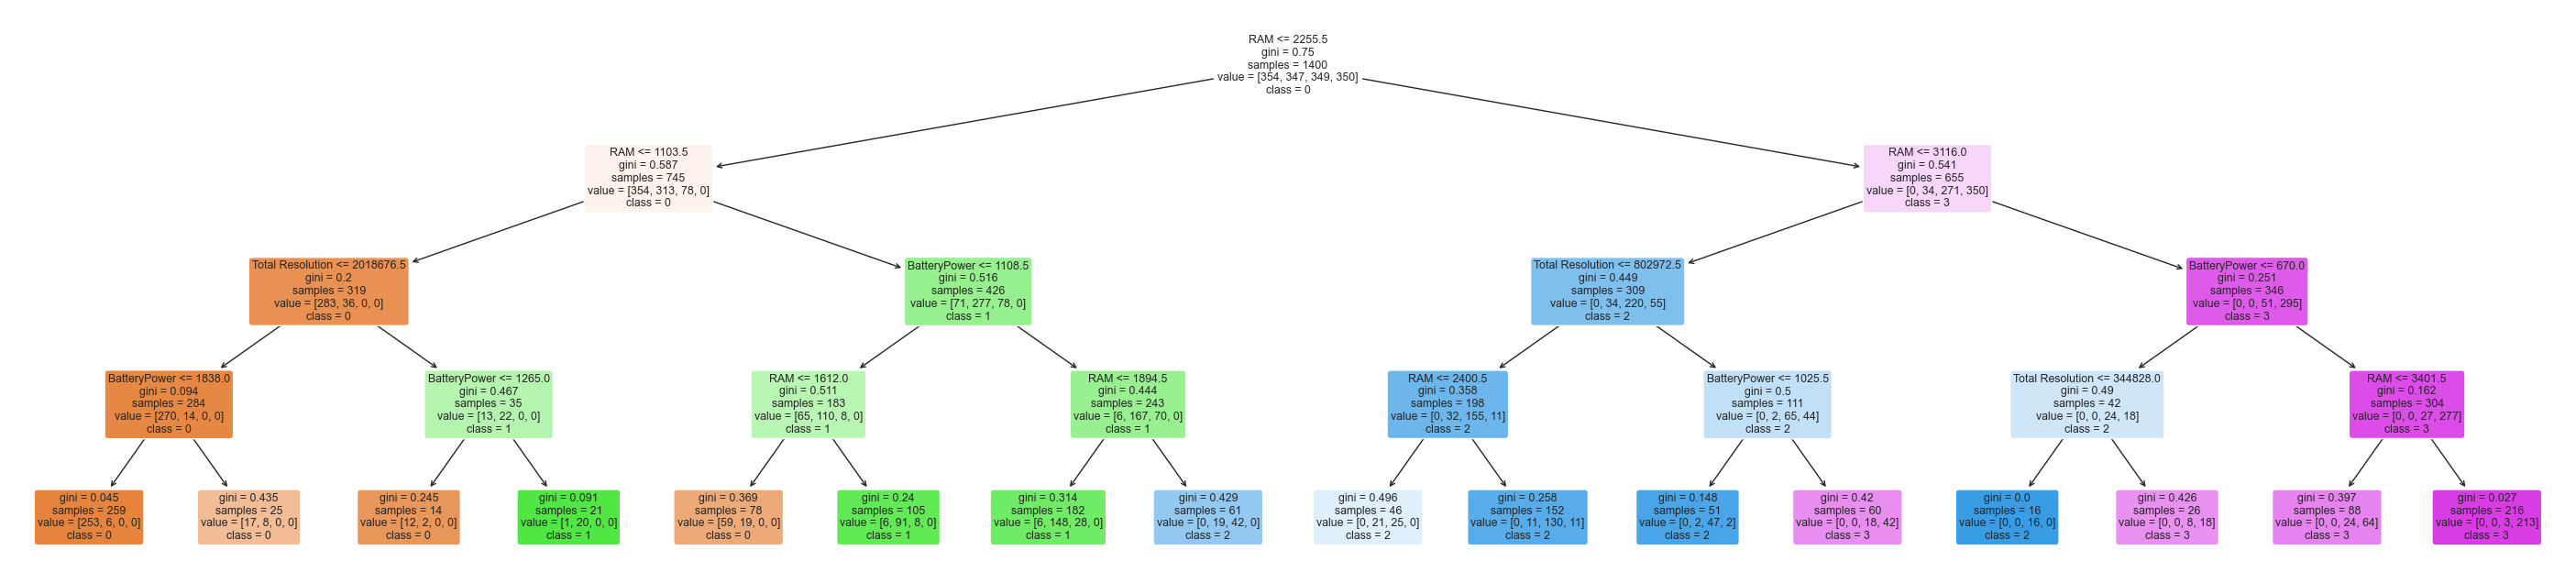

In [43]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree


# Extract Response and Predictors
y = pd.DataFrame(newphonedata['PriceRange'])
X = pd.DataFrame(newphonedata.drop('PriceRange', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(36,8))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=["0","1","2","3"])

Train Data
Accuracy: 0.855

True Positive Rate (TPR) for class 0: 0.963276836158192
True Negative Rate (TNR) for class 0: 0.994263862332696
False Positive Rate (FPR) for class 0: 0.0057361376673040155
False Negative Rate (FNR) for class 0: 0.03672316384180791
True Positive Rate (TPR) for class 1: 0.7463976945244957
True Negative Rate (TNR) for class 1: 0.9924026590693258
False Positive Rate (FPR) for class 1: 0.007597340930674264
False Negative Rate (FNR) for class 1: 0.25360230547550433
True Positive Rate (TPR) for class 2: 0.7449856733524355
True Negative Rate (TNR) for class 2: 0.9914367269267365
False Positive Rate (FPR) for class 2: 0.008563273073263558
False Negative Rate (FNR) for class 2: 0.25501432664756446
True Positive Rate (TPR) for class 3: 0.9628571428571429
True Negative Rate (TNR) for class 3: 0.9095238095238095
False Positive Rate (FPR) for class 3: 0.09047619047619047
False Negative Rate (FNR) for class 3: 0.037142857142857144
Average True Positive Rate (TPR) across a

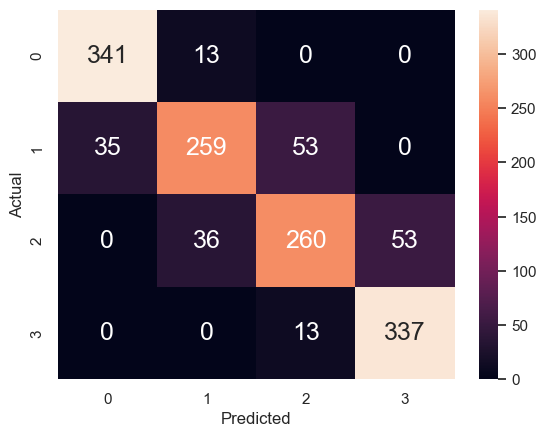

In [44]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy:", dectree.score(X_train, y_train))
print()

# Performance Evaluation on Train Data
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = [cmTrain[i][i] for i in range(4)]  # True Positives for each class
fnTrain = [sum(cmTrain[i]) - cmTrain[i][i] for i in range(4)]  # False Negatives for each class
fpTrain = [abs(sum(cmTrain[j]) - cmTrain[i][i]) for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTrain = [sum(sum(cmTrain)) - tpTrain[i] - fnTrain[i] - fpTrain[i] for i in range(4)]  # True Negatives for each class

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class on the training set
tprTrain = [tpTrain[i] / (tpTrain[i] + fnTrain[i]) for i in range(4)]  # True Positive Rate for each class
tnrTrain = [tnTrain[i] / (tnTrain[i] + fpTrain[i]) for i in range(4)]  # True Negative Rate for each class
fprTrain = [fpTrain[i] / (fpTrain[i] + tnTrain[i]) for i in range(4)]  # False Positive Rate for each class
fnrTrain = [fnTrain[i] / (fnTrain[i] + tpTrain[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class on the training set
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTrain[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTrain[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTrain[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTrain[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes for the training data
avg_tpr_train = sum(tprTrain) / len(tprTrain)
print("Average True Positive Rate (TPR) across all classes (Training Data):", avg_tpr_train)

# Calculate the average True Negative Rate (TNR) across all classes for the training data
avg_tnr_train = sum(tnrTrain) / len(tnrTrain)
print("Average True Negative Rate (TNR) across all classes (Training Data):", avg_tnr_train)

# Calculate the average False Positive Rate (FPR) across all classes for the training data
avg_fpr_train = sum(fprTrain) / len(fprTrain)
print("Average False Positive Rate (FPR) across all classes (Training Data):", avg_fpr_train)

# Calculate the average False Negative Rate (FNR) across all classes for the training data
avg_fnr_train = sum(fnrTrain) / len(fnrTrain)
print("Average False Negative Rate (FNR) across all classes (Training Data):", avg_fnr_train)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot=True, fmt=".0f", annot_kws={"size": 18})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Test Data
Accuracy  :	 0.7866666666666666

True Positive Rate (TPR) for class 0: 0.9178082191780822
True Negative Rate (TNR) for class 0: 0.9581497797356828
False Positive Rate (FPR) for class 0: 0.04185022026431718
False Negative Rate (FNR) for class 0: 0.0821917808219178
True Positive Rate (TPR) for class 1: 0.6405228758169934
True Negative Rate (TNR) for class 1: 0.9619686800894854
False Positive Rate (FPR) for class 1: 0.03803131991051454
False Negative Rate (FNR) for class 1: 0.35947712418300654
True Positive Rate (TPR) for class 2: 0.695364238410596
True Negative Rate (TNR) for class 2: 0.9643652561247216
False Positive Rate (FPR) for class 2: 0.035634743875278395
False Negative Rate (FNR) for class 2: 0.304635761589404
True Positive Rate (TPR) for class 3: 0.9
True Negative Rate (TNR) for class 3: 0.8933333333333333
False Positive Rate (FPR) for class 3: 0.10666666666666667
False Negative Rate (FNR) for class 3: 0.1
Average True Positive Rate (TPR) across all classes: 0.78842383

<Axes: >

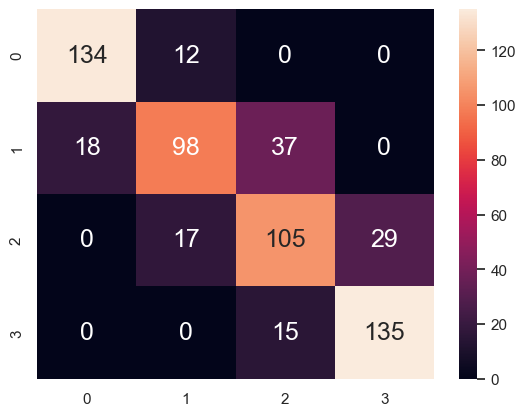

In [45]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()


# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = [cmTest[i][i] for i in range(4)]  # True Positives for each class
fnTest = [sum(cmTest[i]) - cmTest[i][i] for i in range(4)]  # False Negatives for each class
fpTest = [sum(cmTest[j]) - cmTest[i][i] for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTest = [sum(sum(cmTest)) - tpTest[i] - fnTest[i] - fpTest[i] for i in range(4)]  # True Negatives for each class

    
# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class
tprTest = [tpTest[i] / (tpTest[i] + fnTest[i]) for i in range(4)]  # True Positive Rate for each class
tnrTest = [tnTest[i] / (tnTest[i] + fpTest[i]) for i in range(4)]  # True Negative Rate for each class
fprTest = [fpTest[i] / (fpTest[i] + tnTest[i]) for i in range(4)]  # False Positive Rate for each class
fnrTest = [fnTest[i] / (fnTest[i] + tpTest[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTest[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTest[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTest[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTest[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes
avg_tpr = sum(tprTest) / len(tprTest)
print("Average True Positive Rate (TPR) across all classes:", avg_tpr)

# Calculate the average True Negative Rate (TNR) across all classes
avg_tnr = sum(tnrTest) / len(tnrTest)
print("Average True Negative Rate (TNR) across all classes:", avg_tnr)

# Calculate the average False Positive Rate (FPR) across all classes
avg_fpr = sum(fprTest) / len(fprTest)
print("Average False Positive Rate (FPR) across all classes:", avg_fpr)

# Calculate the average False Negative Rate (FNR) across all classes
avg_fnr = sum(fnrTest) / len(fnrTest)
print("Average False Negative Rate (FNR) across all classes:", avg_fnr)
# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## The classification accuracy for the Train and Test data are 0.835 and 0.7966 respectively. It is not consistent. Every time we run the Python Notebook, the classfication accuracy will vary from 2% - 15%. Besides, there are discrepancies of about 2% - 10% between Train and Test data. Hence, we decided to use different machine learning model.

# Model 2: Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Extract Response and Predictors
y = pd.DataFrame(newphonedata['PriceRange'])
X = pd.DataFrame(newphonedata.drop('PriceRange', axis=1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators=100, max_depth=4)
rforest.fit(X_train, y_train.PriceRange.ravel())



RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.8835714285714286
True Positive Rate (TPR) for class 0: 0.9797687861271677
True Negative Rate (TNR) for class 0: 0.9962049335863378
False Positive Rate (FPR) for class 0: 0.003795066413662239
False Negative Rate (FNR) for class 0: 0.02023121387283237
True Positive Rate (TPR) for class 1: 0.7813411078717201
True Negative Rate (TNR) for class 1: 0.9772942289498581
False Positive Rate (FPR) for class 1: 0.02270577105014191
False Negative Rate (FNR) for class 1: 0.21865889212827988
True Positive Rate (TPR) for class 2: 0.8071625344352618
True Negative Rate (TNR) for class 2: 0.991321118611379
False Positive Rate (FPR) for class 2: 0.008678881388621022
False Negative Rate (FNR) for class 2: 0.1928374655647383
True Positive Rate (TPR) for class 3: 0.9683908045977011
True Negative Rate (TNR) for class 3: 0.9258555133079848
False Positive Rate (FPR) for class 3: 0.0741444866920152
False Negative Rate (FNR) for class 3: 0.031609195402298854
Average True Positive Rate (T

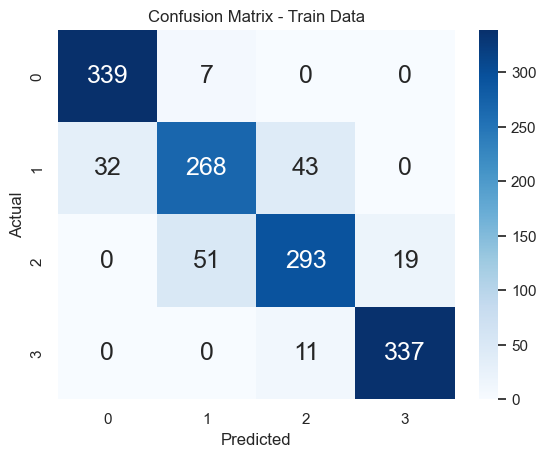

In [47]:
# Predictions on Train Data
y_train_pred = rforest.predict(X_train)

# Performance Evaluation on Train Data
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = [cmTrain[i][i] for i in range(4)]  # True Positives for each class
fnTrain = [sum(cmTrain[i]) - cmTrain[i][i] for i in range(4)]  # False Negatives for each class
fpTrain = [abs(sum(cmTrain[j]) - cmTrain[i][i]) for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTrain = [sum(sum(cmTrain)) - tpTrain[i] - fnTrain[i] - fpTrain[i] for i in range(4)]  # True Negatives for each class

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class on the training set
tprTrain = [tpTrain[i] / (tpTrain[i] + fnTrain[i]) for i in range(4)]  # True Positive Rate for each class
tnrTrain = [tnTrain[i] / (tnTrain[i] + fpTrain[i]) for i in range(4)]  # True Negative Rate for each class
fprTrain = [fpTrain[i] / (fpTrain[i] + tnTrain[i]) for i in range(4)]  # False Positive Rate for each class
fnrTrain = [fnTrain[i] / (fnTrain[i] + tpTrain[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class on the training set
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTrain[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTrain[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTrain[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTrain[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes for the training data
avg_tpr_train = sum(tprTrain) / len(tprTrain)
print("Average True Positive Rate (TPR) across all classes (Training Data):", avg_tpr_train)

# Calculate the average True Negative Rate (TNR) across all classes for the training data
avg_tnr_train = sum(tnrTrain) / len(tnrTrain)
print("Average True Negative Rate (TNR) across all classes (Training Data):", avg_tnr_train)

# Calculate the average False Positive Rate (FPR) across all classes for the training data
avg_fpr_train = sum(fprTrain) / len(fprTrain)
print("Average False Positive Rate (FPR) across all classes (Training Data):", avg_fpr_train)

# Calculate the average False Negative Rate (FNR) across all classes for the training data
avg_fnr_train = sum(fnrTrain) / len(fnrTrain)
print("Average False Negative Rate (FNR) across all classes (Training Data):", avg_fnr_train)

# Plot the two-way Confusion Matrix for Train and Test Data
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Test Data
Accuracy  :	 0.7933333333333333
True Positive Rate (TPR) for class 0: 0.9090909090909091
True Negative Rate (TNR) for class 0: 0.9618834080717489
False Positive Rate (FPR) for class 0: 0.03811659192825112
False Negative Rate (FNR) for class 0: 0.09090909090909091
True Positive Rate (TPR) for class 1: 0.6751592356687898
True Negative Rate (TNR) for class 1: 1.0067720090293453
False Positive Rate (FPR) for class 1: -0.006772009029345372
False Negative Rate (FNR) for class 1: 0.3248407643312102
True Positive Rate (TPR) for class 2: 0.6788321167883211
True Negative Rate (TNR) for class 2: 0.9740820734341252
False Positive Rate (FPR) for class 2: 0.02591792656587473
False Negative Rate (FNR) for class 2: 0.32116788321167883
True Positive Rate (TPR) for class 3: 0.9013157894736842
True Negative Rate (TNR) for class 3: 0.8928571428571429
False Positive Rate (FPR) for class 3: 0.10714285714285714
False Negative Rate (FNR) for class 3: 0.09868421052631579
Average True Positive Rate (

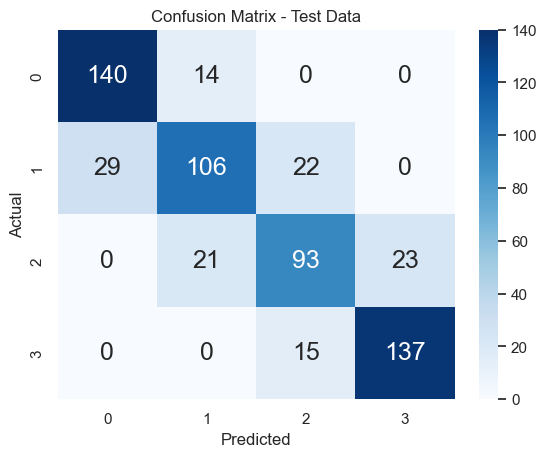

In [48]:
# Predictions on Test Data
y_test_pred = rforest.predict(X_test)

# Performance Evaluation on Test Data
print("\nTest Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = [cmTest[i][i] for i in range(4)]  # True Positives for each class
fnTest = [sum(cmTest[i]) - cmTest[i][i] for i in range(4)]  # False Negatives for each class
fpTest = [sum(cmTest[j]) - cmTest[i][i] for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTest = [sum(sum(cmTest)) - tpTest[i] - fnTest[i] - fpTest[i] for i in range(4)]  # True Negatives for each class

    
# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class
tprTest = [tpTest[i] / (tpTest[i] + fnTest[i]) for i in range(4)]  # True Positive Rate for each class
tnrTest = [tnTest[i] / (tnTest[i] + fpTest[i]) for i in range(4)]  # True Negative Rate for each class
fprTest = [fpTest[i] / (fpTest[i] + tnTest[i]) for i in range(4)]  # False Positive Rate for each class
fnrTest = [fnTest[i] / (fnTest[i] + tpTest[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTest[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTest[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTest[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTest[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes
avg_tpr = sum(tprTest) / len(tprTest)
print("Average True Positive Rate (TPR) across all classes:", avg_tpr)

# Calculate the average True Negative Rate (TNR) across all classes
avg_tnr = sum(tnrTest) / len(tnrTest)
print("Average True Negative Rate (TNR) across all classes:", avg_tnr)

# Calculate the average False Positive Rate (FPR) across all classes
avg_fpr = sum(fprTest) / len(fprTest)
print("Average False Positive Rate (FPR) across all classes:", avg_fpr)

# Calculate the average False Negative Rate (FNR) across all classes
avg_fnr = sum(fnrTest) / len(fnrTest)
print("Average False Negative Rate (FNR) across all classes:", avg_fnr)

sb.heatmap(cmTest, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Model 2.1: Random Forest with number of trees increased

In [49]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators=300, max_depth=4)
rforest.fit(X_train, y_train.PriceRange.ravel())


RandomForestClassifier(max_depth=4, n_estimators=300)

Train Data
Accuracy  :	 0.8807142857142857
True Positive Rate (TPR) for class 0: 0.9710982658959537
True Negative Rate (TNR) for class 0: 0.9933586337760911
False Positive Rate (FPR) for class 0: 0.006641366223908918
False Negative Rate (FNR) for class 0: 0.028901734104046242
True Positive Rate (TPR) for class 1: 0.7784256559766763
True Negative Rate (TNR) for class 1: 0.9744560075685903
False Positive Rate (FPR) for class 1: 0.02554399243140965
False Negative Rate (FNR) for class 1: 0.22157434402332363
True Positive Rate (TPR) for class 2: 0.7988980716253443
True Negative Rate (TNR) for class 2: 0.9884281581485053
False Positive Rate (FPR) for class 2: 0.011571841851494697
False Negative Rate (FNR) for class 2: 0.20110192837465565
True Positive Rate (TPR) for class 3: 0.9770114942528736
True Negative Rate (TNR) for class 3: 0.9249049429657795
False Positive Rate (FPR) for class 3: 0.07509505703422054
False Negative Rate (FNR) for class 3: 0.022988505747126436
Average True Positive Rat

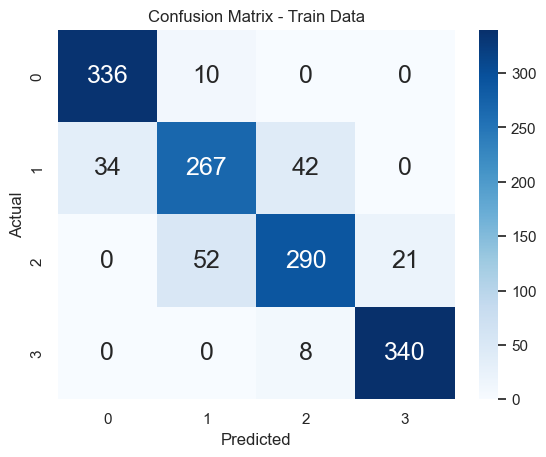

In [50]:
# Predictions on Train Data
y_train_pred = rforest.predict(X_train)

# Performance Evaluation on Train Data
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = [cmTrain[i][i] for i in range(4)]  # True Positives for each class
fnTrain = [sum(cmTrain[i]) - cmTrain[i][i] for i in range(4)]  # False Negatives for each class
fpTrain = [abs(sum(cmTrain[j]) - cmTrain[i][i]) for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTrain = [sum(sum(cmTrain)) - tpTrain[i] - fnTrain[i] - fpTrain[i] for i in range(4)]  # True Negatives for each class

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class on the training set
tprTrain = [tpTrain[i] / (tpTrain[i] + fnTrain[i]) for i in range(4)]  # True Positive Rate for each class
tnrTrain = [tnTrain[i] / (tnTrain[i] + fpTrain[i]) for i in range(4)]  # True Negative Rate for each class
fprTrain = [fpTrain[i] / (fpTrain[i] + tnTrain[i]) for i in range(4)]  # False Positive Rate for each class
fnrTrain = [fnTrain[i] / (fnTrain[i] + tpTrain[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class on the training set
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTrain[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTrain[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTrain[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTrain[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes for the training data
avg_tpr_train = sum(tprTrain) / len(tprTrain)
print("Average True Positive Rate (TPR) across all classes (Training Data):", avg_tpr_train)

# Calculate the average True Negative Rate (TNR) across all classes for the training data
avg_tnr_train = sum(tnrTrain) / len(tnrTrain)
print("Average True Negative Rate (TNR) across all classes (Training Data):", avg_tnr_train)

# Calculate the average False Positive Rate (FPR) across all classes for the training data
avg_fpr_train = sum(fprTrain) / len(fprTrain)
print("Average False Positive Rate (FPR) across all classes (Training Data):", avg_fpr_train)

# Calculate the average False Negative Rate (FNR) across all classes for the training data
avg_fnr_train = sum(fnrTrain) / len(fnrTrain)
print("Average False Negative Rate (FNR) across all classes (Training Data):", avg_fnr_train)

# Plot the two-way Confusion Matrix for Train and Test Data
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Test Data
Accuracy  :	 0.7816666666666666
True Positive Rate (TPR) for class 0: 0.9285714285714286
True Negative Rate (TNR) for class 0: 0.968609865470852
False Positive Rate (FPR) for class 0: 0.03139013452914798
False Negative Rate (FNR) for class 0: 0.07142857142857142
True Positive Rate (TPR) for class 1: 0.6369426751592356
True Negative Rate (TNR) for class 1: 1.0135440180586908
False Positive Rate (FPR) for class 1: -0.013544018058690745
False Negative Rate (FNR) for class 1: 0.3630573248407643
True Positive Rate (TPR) for class 2: 0.6277372262773723
True Negative Rate (TNR) for class 2: 0.980561555075594
False Positive Rate (FPR) for class 2: 0.019438444924406047
False Negative Rate (FNR) for class 2: 0.3722627737226277
True Positive Rate (TPR) for class 3: 0.9210526315789473
True Negative Rate (TNR) for class 3: 0.8794642857142857
False Positive Rate (FPR) for class 3: 0.12053571428571429
False Negative Rate (FNR) for class 3: 0.07894736842105263
Average True Positive Rate (TP

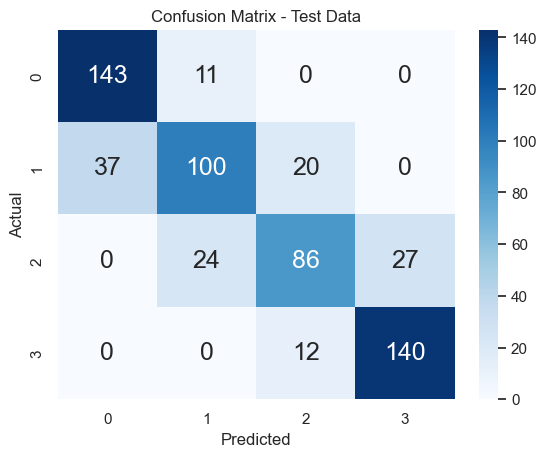

In [51]:
# Predictions on Test Data
y_test_pred = rforest.predict(X_test)

# Performance Evaluation on Test Data
print("\nTest Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = [cmTest[i][i] for i in range(4)]  # True Positives for each class
fnTest = [sum(cmTest[i]) - cmTest[i][i] for i in range(4)]  # False Negatives for each class
fpTest = [sum(cmTest[j]) - cmTest[i][i] for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTest = [sum(sum(cmTest)) - tpTest[i] - fnTest[i] - fpTest[i] for i in range(4)]  # True Negatives for each class

    
# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class
tprTest = [tpTest[i] / (tpTest[i] + fnTest[i]) for i in range(4)]  # True Positive Rate for each class
tnrTest = [tnTest[i] / (tnTest[i] + fpTest[i]) for i in range(4)]  # True Negative Rate for each class
fprTest = [fpTest[i] / (fpTest[i] + tnTest[i]) for i in range(4)]  # False Positive Rate for each class
fnrTest = [fnTest[i] / (fnTest[i] + tpTest[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTest[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTest[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTest[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTest[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes
avg_tpr = sum(tprTest) / len(tprTest)
print("Average True Positive Rate (TPR) across all classes:", avg_tpr)

# Calculate the average True Negative Rate (TNR) across all classes
avg_tnr = sum(tnrTest) / len(tnrTest)
print("Average True Negative Rate (TNR) across all classes:", avg_tnr)

# Calculate the average False Positive Rate (FPR) across all classes
avg_fpr = sum(fprTest) / len(fprTest)
print("Average False Positive Rate (FPR) across all classes:", avg_fpr)

# Calculate the average False Negative Rate (FNR) across all classes
avg_fnr = sum(fnrTest) / len(fnrTest)
print("Average False Negative Rate (FNR) across all classes:", avg_fnr)

sb.heatmap(cmTest, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The accuracy in both Train and Test data almost unchange.

# Model 2.2: Random Forest with depth increased

In [52]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators=100, max_depth=7)
rforest.fit(X_train, y_train.PriceRange.ravel())


RandomForestClassifier(max_depth=7)

Train Data
Accuracy  :	 0.97
True Positive Rate (TPR) for class 0: 0.976878612716763
True Negative Rate (TNR) for class 0: 0.9952561669829222
False Positive Rate (FPR) for class 0: 0.004743833017077799
False Negative Rate (FNR) for class 0: 0.023121387283236993
True Positive Rate (TPR) for class 1: 0.9329446064139941
True Negative Rate (TNR) for class 1: 0.9763481551561022
False Positive Rate (FPR) for class 1: 0.023651844843897825
False Negative Rate (FNR) for class 1: 0.06705539358600583
True Positive Rate (TPR) for class 2: 0.9807162534435262
True Negative Rate (TNR) for class 2: 0.9903567984570878
False Positive Rate (FPR) for class 2: 0.009643201542912247
False Negative Rate (FNR) for class 2: 0.01928374655647383
True Positive Rate (TPR) for class 3: 0.9885057471264368
True Negative Rate (TNR) for class 3: 0.9752851711026616
False Positive Rate (FPR) for class 3: 0.024714828897338403
False Negative Rate (FNR) for class 3: 0.011494252873563218
Average True Positive Rate (TPR) acros

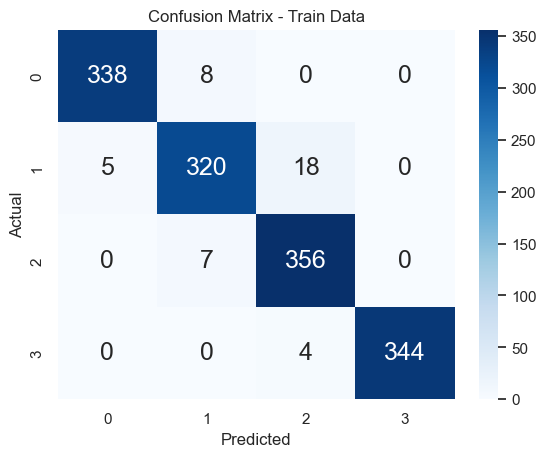

In [53]:
# Predictions on Train Data
y_train_pred = rforest.predict(X_train)

# Performance Evaluation on Train Data
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = [cmTrain[i][i] for i in range(4)]  # True Positives for each class
fnTrain = [sum(cmTrain[i]) - cmTrain[i][i] for i in range(4)]  # False Negatives for each class
fpTrain = [abs(sum(cmTrain[j]) - cmTrain[i][i]) for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTrain = [sum(sum(cmTrain)) - tpTrain[i] - fnTrain[i] - fpTrain[i] for i in range(4)]  # True Negatives for each class

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class on the training set
tprTrain = [tpTrain[i] / (tpTrain[i] + fnTrain[i]) for i in range(4)]  # True Positive Rate for each class
tnrTrain = [tnTrain[i] / (tnTrain[i] + fpTrain[i]) for i in range(4)]  # True Negative Rate for each class
fprTrain = [fpTrain[i] / (fpTrain[i] + tnTrain[i]) for i in range(4)]  # False Positive Rate for each class
fnrTrain = [fnTrain[i] / (fnTrain[i] + tpTrain[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class on the training set
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTrain[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTrain[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTrain[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTrain[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes for the training data
avg_tpr_train = sum(tprTrain) / len(tprTrain)
print("Average True Positive Rate (TPR) across all classes (Training Data):", avg_tpr_train)

# Calculate the average True Negative Rate (TNR) across all classes for the training data
avg_tnr_train = sum(tnrTrain) / len(tnrTrain)
print("Average True Negative Rate (TNR) across all classes (Training Data):", avg_tnr_train)

# Calculate the average False Positive Rate (FPR) across all classes for the training data
avg_fpr_train = sum(fprTrain) / len(fprTrain)
print("Average False Positive Rate (FPR) across all classes (Training Data):", avg_fpr_train)

# Calculate the average False Negative Rate (FNR) across all classes for the training data
avg_fnr_train = sum(fnrTrain) / len(fnrTrain)
print("Average False Negative Rate (FNR) across all classes (Training Data):", avg_fnr_train)

# Plot the two-way Confusion Matrix for Train and Test Data
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Test Data
Accuracy  :	 0.8283333333333334
True Positive Rate (TPR) for class 0: 0.9415584415584416
True Negative Rate (TNR) for class 0: 0.9730941704035875
False Positive Rate (FPR) for class 0: 0.026905829596412557
False Negative Rate (FNR) for class 0: 0.05844155844155844
True Positive Rate (TPR) for class 1: 0.6942675159235668
True Negative Rate (TNR) for class 1: 1.018058690744921
False Positive Rate (FPR) for class 1: -0.01805869074492099
False Negative Rate (FNR) for class 1: 0.3057324840764331
True Positive Rate (TPR) for class 2: 0.8102189781021898
True Negative Rate (TNR) for class 2: 0.9848812095032398
False Positive Rate (FPR) for class 2: 0.01511879049676026
False Negative Rate (FNR) for class 2: 0.1897810218978102
True Positive Rate (TPR) for class 3: 0.868421052631579
True Negative Rate (TNR) for class 3: 0.8995535714285714
False Positive Rate (FPR) for class 3: 0.10044642857142858
False Negative Rate (FNR) for class 3: 0.13157894736842105
Average True Positive Rate (TPR

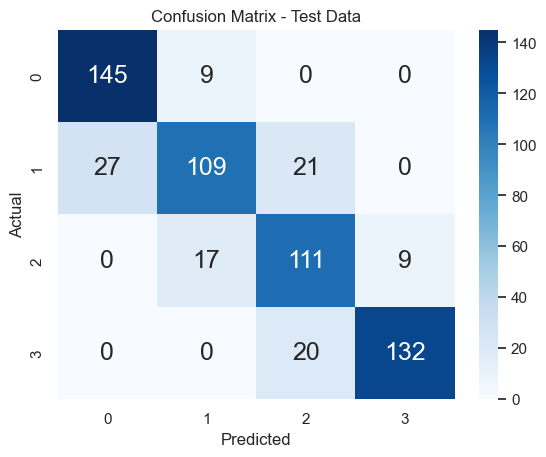

In [54]:
# Predictions on Test Data
y_test_pred = rforest.predict(X_test)

# Performance Evaluation on Test Data
print("\nTest Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = [cmTest[i][i] for i in range(4)]  # True Positives for each class
fnTest = [sum(cmTest[i]) - cmTest[i][i] for i in range(4)]  # False Negatives for each class
fpTest = [sum(cmTest[j]) - cmTest[i][i] for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTest = [sum(sum(cmTest)) - tpTest[i] - fnTest[i] - fpTest[i] for i in range(4)]  # True Negatives for each class

    
# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class
tprTest = [tpTest[i] / (tpTest[i] + fnTest[i]) for i in range(4)]  # True Positive Rate for each class
tnrTest = [tnTest[i] / (tnTest[i] + fpTest[i]) for i in range(4)]  # True Negative Rate for each class
fprTest = [fpTest[i] / (fpTest[i] + tnTest[i]) for i in range(4)]  # False Positive Rate for each class
fnrTest = [fnTest[i] / (fnTest[i] + tpTest[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTest[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTest[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTest[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTest[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes
avg_tpr = sum(tprTest) / len(tprTest)
print("Average True Positive Rate (TPR) across all classes:", avg_tpr)

# Calculate the average True Negative Rate (TNR) across all classes
avg_tnr = sum(tnrTest) / len(tnrTest)
print("Average True Negative Rate (TNR) across all classes:", avg_tnr)

# Calculate the average False Positive Rate (FPR) across all classes
avg_fpr = sum(fprTest) / len(fprTest)
print("Average False Positive Rate (FPR) across all classes:", avg_fpr)

# Calculate the average False Negative Rate (FNR) across all classes
avg_fnr = sum(fnrTest) / len(fnrTest)
print("Average False Negative Rate (FNR) across all classes:", avg_fnr)

sb.heatmap(cmTest, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The accuracy for both Train and Test data have increases.

# Model 2.3: Random Forest with both depth and number of trees increased.

In [55]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators=300, max_depth=7)
rforest.fit(X_train, y_train.PriceRange.ravel())


RandomForestClassifier(max_depth=7, n_estimators=300)

Train Data
Accuracy  :	 0.9757142857142858
True Positive Rate (TPR) for class 0: 0.976878612716763
True Negative Rate (TNR) for class 0: 0.9952561669829222
False Positive Rate (FPR) for class 0: 0.004743833017077799
False Negative Rate (FNR) for class 0: 0.023121387283236993
True Positive Rate (TPR) for class 1: 0.9533527696793003
True Negative Rate (TNR) for class 1: 0.9763481551561022
False Positive Rate (FPR) for class 1: 0.023651844843897825
False Negative Rate (FNR) for class 1: 0.04664723032069971
True Positive Rate (TPR) for class 2: 0.9862258953168044
True Negative Rate (TNR) for class 2: 0.9903567984570878
False Positive Rate (FPR) for class 2: 0.009643201542912247
False Negative Rate (FNR) for class 2: 0.013774104683195593
True Positive Rate (TPR) for class 3: 0.985632183908046
True Negative Rate (TNR) for class 3: 0.9819391634980988
False Positive Rate (FPR) for class 3: 0.01806083650190114
False Negative Rate (FNR) for class 3: 0.014367816091954023
Average True Positive Rat

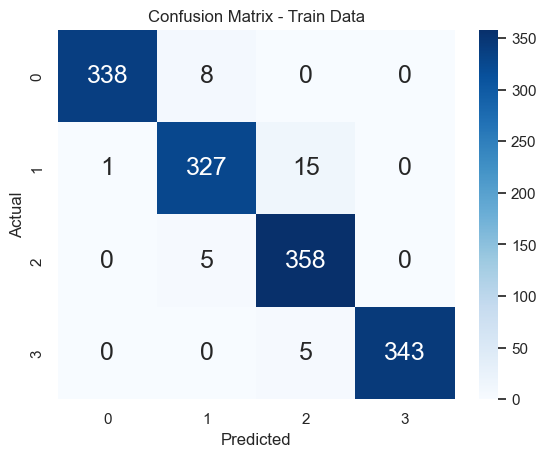

In [56]:
# Predictions on Train Data
y_train_pred = rforest.predict(X_train)

# Performance Evaluation on Train Data
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = [cmTrain[i][i] for i in range(4)]  # True Positives for each class
fnTrain = [sum(cmTrain[i]) - cmTrain[i][i] for i in range(4)]  # False Negatives for each class
fpTrain = [abs(sum(cmTrain[j]) - cmTrain[i][i]) for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTrain = [sum(sum(cmTrain)) - tpTrain[i] - fnTrain[i] - fpTrain[i] for i in range(4)]  # True Negatives for each class

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class on the training set
tprTrain = [tpTrain[i] / (tpTrain[i] + fnTrain[i]) for i in range(4)]  # True Positive Rate for each class
tnrTrain = [tnTrain[i] / (tnTrain[i] + fpTrain[i]) for i in range(4)]  # True Negative Rate for each class
fprTrain = [fpTrain[i] / (fpTrain[i] + tnTrain[i]) for i in range(4)]  # False Positive Rate for each class
fnrTrain = [fnTrain[i] / (fnTrain[i] + tpTrain[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class on the training set
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTrain[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTrain[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTrain[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTrain[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes for the training data
avg_tpr_train = sum(tprTrain) / len(tprTrain)
print("Average True Positive Rate (TPR) across all classes (Training Data):", avg_tpr_train)

# Calculate the average True Negative Rate (TNR) across all classes for the training data
avg_tnr_train = sum(tnrTrain) / len(tnrTrain)
print("Average True Negative Rate (TNR) across all classes (Training Data):", avg_tnr_train)

# Calculate the average False Positive Rate (FPR) across all classes for the training data
avg_fpr_train = sum(fprTrain) / len(fprTrain)
print("Average False Positive Rate (FPR) across all classes (Training Data):", avg_fpr_train)

# Calculate the average False Negative Rate (FNR) across all classes for the training data
avg_fnr_train = sum(fnrTrain) / len(fnrTrain)
print("Average False Negative Rate (FNR) across all classes (Training Data):", avg_fnr_train)

# Plot the two-way Confusion Matrix for Train and Test Data
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Test Data
Accuracy  :	 0.8383333333333334
True Positive Rate (TPR) for class 0: 0.935064935064935
True Negative Rate (TNR) for class 0: 0.9708520179372198
False Positive Rate (FPR) for class 0: 0.02914798206278027
False Negative Rate (FNR) for class 0: 0.06493506493506493
True Positive Rate (TPR) for class 1: 0.7770700636942676
True Negative Rate (TNR) for class 1: 1.0158013544018059
False Positive Rate (FPR) for class 1: -0.01580135440180587
False Negative Rate (FNR) for class 1: 0.2229299363057325
True Positive Rate (TPR) for class 2: 0.7737226277372263
True Negative Rate (TNR) for class 2: 0.9827213822894169
False Positive Rate (FPR) for class 2: 0.017278617710583154
False Negative Rate (FNR) for class 2: 0.22627737226277372
True Positive Rate (TPR) for class 3: 0.8618421052631579
True Negative Rate (TNR) for class 3: 0.9285714285714286
False Positive Rate (FPR) for class 3: 0.07142857142857142
False Negative Rate (FNR) for class 3: 0.13815789473684212
Average True Positive Rate (T

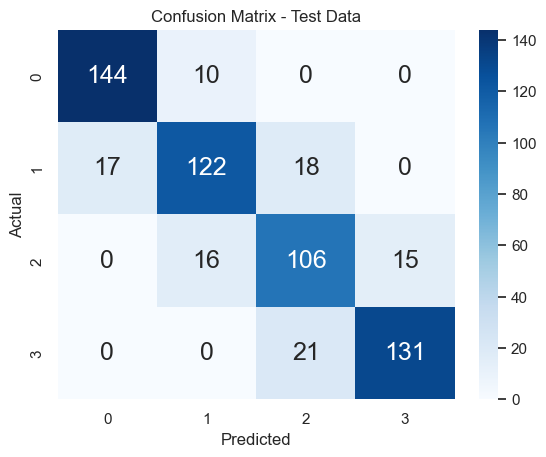

In [57]:
# Predictions on Test Data
y_test_pred = rforest.predict(X_test)

# Performance Evaluation on Test Data
print("\nTest Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = [cmTest[i][i] for i in range(4)]  # True Positives for each class
fnTest = [sum(cmTest[i]) - cmTest[i][i] for i in range(4)]  # False Negatives for each class
fpTest = [sum(cmTest[j]) - cmTest[i][i] for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTest = [sum(sum(cmTest)) - tpTest[i] - fnTest[i] - fpTest[i] for i in range(4)]  # True Negatives for each class

    
# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class
tprTest = [tpTest[i] / (tpTest[i] + fnTest[i]) for i in range(4)]  # True Positive Rate for each class
tnrTest = [tnTest[i] / (tnTest[i] + fpTest[i]) for i in range(4)]  # True Negative Rate for each class
fprTest = [fpTest[i] / (fpTest[i] + tnTest[i]) for i in range(4)]  # False Positive Rate for each class
fnrTest = [fnTest[i] / (fnTest[i] + tpTest[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTest[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTest[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTest[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTest[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes
avg_tpr = sum(tprTest) / len(tprTest)
print("Average True Positive Rate (TPR) across all classes:", avg_tpr)

# Calculate the average True Negative Rate (TNR) across all classes
avg_tnr = sum(tnrTest) / len(tnrTest)
print("Average True Negative Rate (TNR) across all classes:", avg_tnr)

# Calculate the average False Positive Rate (FPR) across all classes
avg_fpr = sum(fprTest) / len(fprTest)
print("Average False Positive Rate (FPR) across all classes:", avg_fpr)

# Calculate the average False Negative Rate (FNR) across all classes
avg_fnr = sum(fnrTest) / len(fnrTest)
print("Average False Negative Rate (FNR) across all classes:", avg_fnr)

sb.heatmap(cmTest, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## We note that with a greater number of trees and deeper trees in the forest, the accuracy of the random forest is getting better on both the train and test sets. But the gap between the performance on the train and the test data is increasing too. This suggests that the random forest model may be overfitting to the training data. Our model is now able to give accurate predictions for training data but cannot perform well for test data.

# Model 3: Using hyperparameter found by Cross-Validation and Grid Search

In [73]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Extract Response and Predictors
y = pd.DataFrame(newphonedata['PriceRange'])
X = pd.DataFrame(newphonedata.drop('PriceRange', axis=1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [66]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': np.arange(100, 501, 50),
    'max_depth': np.arange(4, 8)             
}

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv=5,                       # 5-fold cross-validation
                      scoring='accuracy')         # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.PriceRange.ravel())

# Retrieve the best parameters and the best score
best_params = hpGrid.best_params_
best_score = hpGrid.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': 7, 'n_estimators': 500}
Best Score: 0.8457142857142858


##### Best Parameters: {'max_depth': 7, 'n_estimators': 500}

In [67]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators=500, max_depth=7)
rforest.fit(X_train, y_train.PriceRange.ravel())


RandomForestClassifier(max_depth=7, n_estimators=500)

Train Data
Accuracy  :	 0.9385714285714286
True Positive Rate (TPR) for class 0: 0.9885714285714285
True Negative Rate (TNR) for class 0: 1.0
False Positive Rate (FPR) for class 0: 0.0
False Negative Rate (FNR) for class 0: 0.011428571428571429
True Positive Rate (TPR) for class 1: 0.8728323699421965
True Negative Rate (TNR) for class 1: 0.9971537001897534
False Positive Rate (FPR) for class 1: 0.0028462998102466793
False Negative Rate (FNR) for class 1: 0.12716763005780346
True Positive Rate (TPR) for class 2: 0.9226361031518625
True Negative Rate (TNR) for class 2: 0.9914367269267365
False Positive Rate (FPR) for class 2: 0.008563273073263558
False Negative Rate (FNR) for class 2: 0.07736389684813753
True Positive Rate (TPR) for class 3: 0.9690140845070423
True Negative Rate (TNR) for class 3: 0.9540669856459331
False Positive Rate (FPR) for class 3: 0.045933014354066985
False Negative Rate (FNR) for class 3: 0.030985915492957747
Average True Positive Rate (TPR) across all classes (T

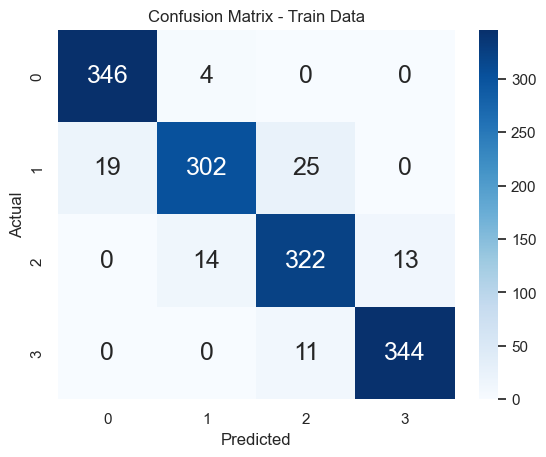

In [74]:
# Predictions on Train Data
y_train_pred = rforest.predict(X_train)

# Performance Evaluation on Train Data
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = [cmTrain[i][i] for i in range(4)]  # True Positives for each class
fnTrain = [sum(cmTrain[i]) - cmTrain[i][i] for i in range(4)]  # False Negatives for each class
fpTrain = [abs(sum(cmTrain[j]) - cmTrain[i][i]) for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTrain = [sum(sum(cmTrain)) - tpTrain[i] - fnTrain[i] - fpTrain[i] for i in range(4)]  # True Negatives for each class

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class on the training set
tprTrain = [tpTrain[i] / (tpTrain[i] + fnTrain[i]) for i in range(4)]  # True Positive Rate for each class
tnrTrain = [tnTrain[i] / (tnTrain[i] + fpTrain[i]) for i in range(4)]  # True Negative Rate for each class
fprTrain = [fpTrain[i] / (fpTrain[i] + tnTrain[i]) for i in range(4)]  # False Positive Rate for each class
fnrTrain = [fnTrain[i] / (fnTrain[i] + tpTrain[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class on the training set
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTrain[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTrain[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTrain[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTrain[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes for the training data
avg_tpr_train = sum(tprTrain) / len(tprTrain)
print("Average True Positive Rate (TPR) across all classes (Training Data):", avg_tpr_train)

# Calculate the average True Negative Rate (TNR) across all classes for the training data
avg_tnr_train = sum(tnrTrain) / len(tnrTrain)
print("Average True Negative Rate (TNR) across all classes (Training Data):", avg_tnr_train)

# Calculate the average False Positive Rate (FPR) across all classes for the training data
avg_fpr_train = sum(fprTrain) / len(fprTrain)
print("Average False Positive Rate (FPR) across all classes (Training Data):", avg_fpr_train)

# Calculate the average False Negative Rate (FNR) across all classes for the training data
avg_fnr_train = sum(fnrTrain) / len(fnrTrain)
print("Average False Negative Rate (FNR) across all classes (Training Data):", avg_fnr_train)

# Plot the two-way Confusion Matrix for Train and Test Data
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Test Data
Accuracy  :	 0.9433333333333334
True Positive Rate (TPR) for class 0: 0.9533333333333334
True Negative Rate (TNR) for class 0: 0.9755555555555555
False Positive Rate (FPR) for class 0: 0.024444444444444446
False Negative Rate (FNR) for class 0: 0.04666666666666667
True Positive Rate (TPR) for class 1: 0.9415584415584416
True Negative Rate (TNR) for class 1: 0.9820627802690582
False Positive Rate (FPR) for class 1: 0.017937219730941704
False Negative Rate (FNR) for class 1: 0.05844155844155844
True Positive Rate (TPR) for class 2: 0.9139072847682119
True Negative Rate (TNR) for class 2: 0.9955456570155902
False Positive Rate (FPR) for class 2: 0.004454342984409799
False Negative Rate (FNR) for class 2: 0.08609271523178808
True Positive Rate (TPR) for class 3: 0.9655172413793104
True Negative Rate (TNR) for class 3: 0.989010989010989
False Positive Rate (FPR) for class 3: 0.01098901098901099
False Negative Rate (FNR) for class 3: 0.034482758620689655
Average True Positive Rate

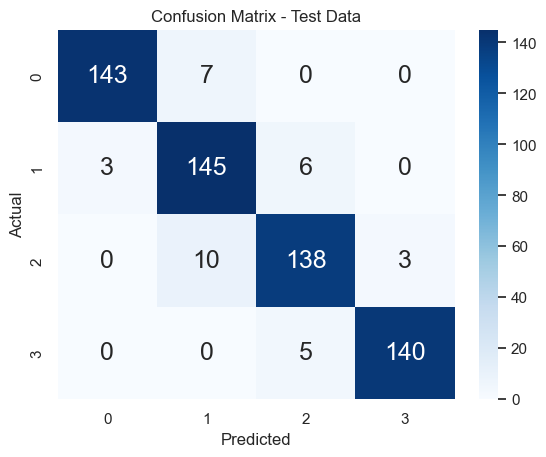

In [75]:
# Predictions on Test Data
y_test_pred = rforest.predict(X_test)

# Performance Evaluation on Test Data
print("\nTest Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = [cmTest[i][i] for i in range(4)]  # True Positives for each class
fnTest = [sum(cmTest[i]) - cmTest[i][i] for i in range(4)]  # False Negatives for each class
fpTest = [sum(cmTest[j]) - cmTest[i][i] for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTest = [sum(sum(cmTest)) - tpTest[i] - fnTest[i] - fpTest[i] for i in range(4)]  # True Negatives for each class

    
# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class
tprTest = [tpTest[i] / (tpTest[i] + fnTest[i]) for i in range(4)]  # True Positive Rate for each class
tnrTest = [tnTest[i] / (tnTest[i] + fpTest[i]) for i in range(4)]  # True Negative Rate for each class
fprTest = [fpTest[i] / (fpTest[i] + tnTest[i]) for i in range(4)]  # False Positive Rate for each class
fnrTest = [fnTest[i] / (fnTest[i] + tpTest[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTest[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTest[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTest[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTest[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes
avg_tpr = sum(tprTest) / len(tprTest)
print("Average True Positive Rate (TPR) across all classes:", avg_tpr)

# Calculate the average True Negative Rate (TNR) across all classes
avg_tnr = sum(tnrTest) / len(tnrTest)
print("Average True Negative Rate (TNR) across all classes:", avg_tnr)

# Calculate the average False Positive Rate (FPR) across all classes
avg_fpr = sum(fprTest) / len(fprTest)
print("Average False Positive Rate (FPR) across all classes:", avg_fpr)

# Calculate the average False Negative Rate (FNR) across all classes
avg_fnr = sum(fnrTest) / len(fnrTest)
print("Average False Negative Rate (FNR) across all classes:", avg_fnr)

sb.heatmap(cmTest, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## By using GridSearch, we tuned the number and depth of trees to (500) and (7) respectively. Finally, the discrepancies in classification accuracy between the train and test data were reduced. This model has the highest classification accuracy and performs well for both train and test data.